# Class Imbalance

## Oversampling

Print [[0.         0.2236068  0.31622777]
 [0.         0.2236068  0.2236068 ]
 [0.         0.2236068  0.31622777]]     [[0 1 2]
 [1 2 0]
 [2 1 0]]


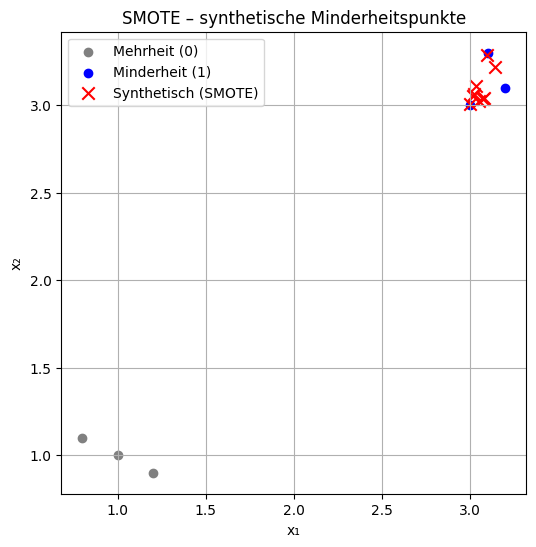

In [14]:
# SMOTE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# --- 1. Beispiel-Daten -----------------------------------------
# Mehrheit (Klasse 0)
X_majority = np.array([
    [1.0, 1.0],
    [1.2, 0.9],
    [0.8, 1.1],
])

# Minderheit (Klasse 1)
X_minority = np.array([
    [3.0, 3.0],
    [3.2, 3.1],
    [3.1, 3.3],
])

# --- 2. Parameter ----------------------------------------------
k = 2       # Anzahl nächster Nachbarn
n_new = 9   # Anzahl neuer synthetischer Punkte

# --- 3. k-Nachbarn der Minderheit bestimmen --------------------
nn = NearestNeighbors(n_neighbors=k+1).fit(X_minority)
distances, indices = nn.kneighbors(X_minority)

print("Print", distances, "   ", indices)

synthetic_points = []

# --- 4. Synthetische Punkte erzeugen ---------------------------
for _ in range(n_new):
    i = np.random.randint(len(X_minority))              # wähle zufälligen Minderheitspunkt
    neighbor_idx = np.random.choice(indices[i][1:])     # wähle zufälligen Nachbarn (nicht sich selbst)
    delta = np.random.rand()                            # Faktor zwischen 0 und 1
    new_point = X_minority[i] + delta * (X_minority[neighbor_idx] - X_minority[i])
    synthetic_points.append(new_point)

synthetic_points = np.array(synthetic_points)

# --- 5. Plot ---------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(X_majority[:,0], X_majority[:,1], color="gray", label="Mehrheit (0)")
plt.scatter(X_minority[:,0], X_minority[:,1], color="blue", label="Minderheit (1)")
plt.scatter(synthetic_points[:,0], synthetic_points[:,1], color="red", marker="x", s=80,
            label="Synthetisch (SMOTE)")

plt.title("SMOTE – synthetische Minderheitspunkte")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()

X-> [[1.  1. ]
 [1.2 0.9]
 [0.8 1.1]
 [3.  3. ]
 [3.1 3.2]]
r_i (vor Normierung): [0.66666667 0.66666667]
r_i (nach Normierung): [0.5 0.5]
Neue Punkte pro Minderheitspunkt: [2 2]


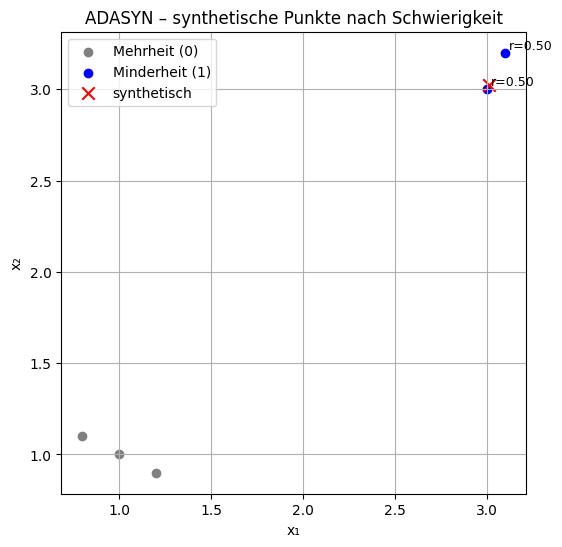

In [4]:
# ADASYS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# --- 1. Datensatz (vereinfachtes Beispiel) ---------------------
# Mehrheit (Klasse 0)
X_majority = np.array([
    [1.0, 1.0],
    [1.2, 0.9],
    [0.8, 1.1]
])

# Minderheit (Klasse 1)
X_minority = np.array([
    [3.0, 3.0],
    [3.1, 3.2]
])

# Zusammenführen
X = np.vstack([X_majority, X_minority])
y = np.array([0, 0, 0, 1, 1])

print("X->", X)

# --- 2. Parameter ---------------------
k = 3                 # Anzahl Nachbarn
G = 4                 # Gesamtzahl neuer Minderheitspunkte

# --- 3. k-Nachbarn berechnen ---------------------
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)  # +1, weil der Punkt selbst dazugehört
distances, indices = nbrs.kneighbors(X_minority)

# --- 4. r_i bestimmen (Schwierigkeit pro Punkt) ---------------------
r = []
for i, neighbors in enumerate(indices):
    # Nachbarn außer sich selbst
    neighbor_labels = y[neighbors[1:]]
    # Anteil Mehrheitspunkte
    r_i = np.sum(neighbor_labels == 0) / k
    r.append(r_i)

r = np.array(r)
r_norm = r / np.sum(r)   # normieren, damit Summe = 1

print("r_i (vor Normierung):", r)
print("r_i (nach Normierung):", r_norm)

# --- 5. Anzahl neuer Punkte pro Minderheitspunkt ---------------------
G_i = (r_norm * G).astype(int)
print("Neue Punkte pro Minderheitspunkt:", G_i)

# --- 6. Synthetische Punkte erzeugen ---------------------
synthetic_points = []

for i, g in enumerate(G_i):
    for _ in range(g):
        # zufälligen Minderheitsnachbarn auswählen
        neighbor_idx = np.random.choice(indices[i][1:])  # exclude self
        if y[neighbor_idx] != 1:
            # Wenn zufällig ein Mehrheitspunkt war, nochmal ziehen
            continue
        delta = np.random.rand()
        new_point = X_minority[i] + delta * (X[neighbor_idx] - X_minority[i])
        synthetic_points.append(new_point)

synthetic_points = np.array(synthetic_points)

# --- 7. Plot ---------------------
plt.figure(figsize=(6,6))
plt.scatter(X_majority[:,0], X_majority[:,1], color="gray", label="Mehrheit (0)")
plt.scatter(X_minority[:,0], X_minority[:,1], color="blue", label="Minderheit (1)")
if len(synthetic_points) > 0:
    plt.scatter(synthetic_points[:,0], synthetic_points[:,1],
                color="red", marker="x", s=80, label="synthetisch")

for i, (x, y_) in enumerate(X_minority):
    plt.text(x + 0.02, y_ + 0.02, f"r={r_norm[i]:.2f}", fontsize=9)

plt.legend()
plt.title("ADASYN – synthetische Punkte nach Schwierigkeit")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()

## Undersampling

Vorher: Mehrheit = 50, Minderheit = 10
Nachher: Mehrheit = 10, Minderheit = 10


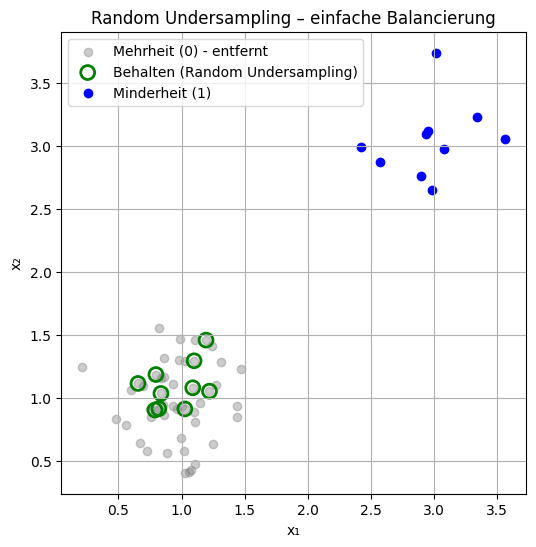

In [10]:
# Random Undersampling
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Datensatz generieren --------------------------------
# Mehrheit (0)
np.random.seed(42)
X_majority = np.random.normal(loc=[1, 1], scale=0.3, size=(50, 2))

# Minderheit (1)
X_minority = np.random.normal(loc=[3, 3], scale=0.3, size=(10, 2))

y_majority = np.zeros(len(X_majority), dtype=int)
y_minority = np.ones(len(X_minority), dtype=int)

# --- 2. Random Undersampling -------------------------------
target_ratio = 1.0  # Zielverhältnis 1:1
n_keep = int(len(X_minority) * target_ratio)

keep_indices = np.random.choice(len(X_majority), size=n_keep, replace=False)
remove_indices = np.setdiff1d(np.arange(len(X_majority)), keep_indices)

X_majority_resampled = X_majority[keep_indices]

print(f"Vorher: Mehrheit = {len(X_majority)}, Minderheit = {len(X_minority)}")
print(f"Nachher: Mehrheit = {len(X_majority_resampled)}, Minderheit = {len(X_minority)}")

# --- 3. Plot -----------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(X_majority[:,0], X_majority[:,1], color="gray", alpha=0.4, label="Mehrheit (0) - entfernt")
plt.scatter(X_majority_resampled[:,0], X_majority_resampled[:,1],
            edgecolor="green", facecolor="none", s=100, linewidth=2,
            label="Behalten (Random Undersampling)")
plt.scatter(X_minority[:,0], X_minority[:,1], color="blue", label="Minderheit (1)")

plt.title("Random Undersampling – einfache Balancierung")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()

Tomek Links: [(1, np.int64(2)), (2, np.int64(1))]


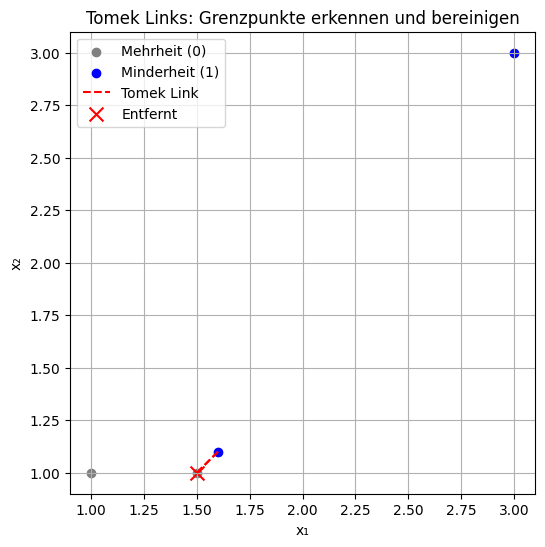

In [11]:
# Tomek Links
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Beispiel-Daten
X = np.array([
    [1.0, 1.0],  # A
    [1.5, 1.0],  # B
    [1.6, 1.1],  # C
    [3.0, 3.0],  # D
])
y = np.array([0, 0, 1, 1])

# 1. Finde jeweils den nächsten Nachbarn
nn = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nn.kneighbors(X)

tomek_links = []
for i in range(len(X)):
    j = indices[i, 1]  # nächster Nachbar
    if y[i] != y[j]:
        if indices[j, 1] == i:  # gegenseitig
            tomek_links.append((i, j))

print("Tomek Links:", tomek_links)

# 2. Entferne Mehrheitspunkte aus Tomek Links
remove_indices = [i for (i, j) in tomek_links if y[i] == 0]
mask = np.ones(len(X), dtype=bool)
mask[remove_indices] = False

# 3. Plot
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0,0], X[y==0,1], color="gray", label="Mehrheit (0)")
plt.scatter(X[y==1,0], X[y==1,1], color="blue", label="Minderheit (1)")
for i, j in tomek_links:
    plt.plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], 'r--', label="Tomek Link" if i==tomek_links[0][0] else "")
plt.scatter(X[~mask,0], X[~mask,1], color="red", marker="x", s=100, label="Entfernt")

plt.legend()
plt.title("Tomek Links: Grenzpunkte erkennen und bereinigen")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()

Durchschnittliche Distanz zur Minderheit (r_i, vor Normierung): [2.93490419 2.4521623  2.08387907]
r_i (nach Normierung): [1.   0.43 0.  ]
Behalte Mehrheitspunkte: [2 1]
Entferne Mehrheitspunkte: [0]


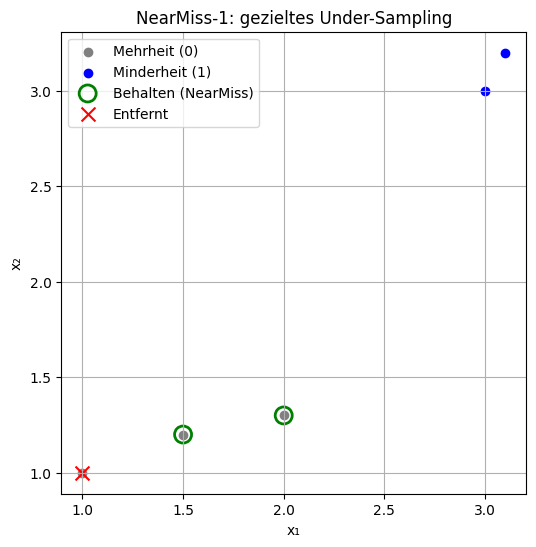

In [12]:
# NearMiss (korrektes k gemäß Sample-Anzahl)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# --- 1. Datensatz -----------------------------
X_majority = np.array([
    [1.0, 1.0],  # A
    [1.5, 1.2],  # B
    [2.0, 1.3],  # C
])
X_minority = np.array([
    [3.0, 3.0],  # D
    [3.1, 3.2],  # E
])
y_majority = np.zeros(len(X_majority), dtype=int)
y_minority = np.ones(len(X_minority), dtype=int)

# --- 2. Parameter -----------------------------
# ACHTUNG: k darf maximal len(X_minority) sein! Ansonsten ValueError.
k = 2  # Wegen len(X_minority)=2, daher maximal 2 möglich
target_ratio = 1.0  # Ziel: Klassen gleich groß machen

# --- 3. Distanz von Mehrheit zu Minderheit berechnen -----------------
nbrs = NearestNeighbors(n_neighbors=k).fit(X_minority)
distances, _ = nbrs.kneighbors(X_majority)
avg_dist = distances.mean(axis=1)

print("Durchschnittliche Distanz zur Minderheit (r_i, vor Normierung):", np.round(avg_dist, 8))

# Für Demonstration: Normierung der Abstände (auf [0,1])
# (hier alle gleich, daher min=max)
if np.ptp(avg_dist) > 0:
    avg_dist_norm = (avg_dist - avg_dist.min()) / (avg_dist.max() - avg_dist.min())
else:
    avg_dist_norm = np.full_like(avg_dist, 0.5)
print("r_i (nach Normierung):", np.round(avg_dist_norm, 2))

# --- 4. NearMiss-Auswahl/Unter-Sampling -------------------------------
n_minority = len(X_minority)
n_keep = int(n_minority * target_ratio)
keep_indices = np.argsort(avg_dist)[:n_keep]
remove_indices = np.setdiff1d(np.arange(len(X_majority)), keep_indices)

print("Behalte Mehrheitspunkte:", keep_indices)
print("Entferne Mehrheitspunkte:", remove_indices)

# --- 5. Visualisierung -----------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(X_majority[:,0], X_majority[:,1], color="gray", label="Mehrheit (0)")
plt.scatter(X_minority[:,0], X_minority[:,1], color="blue", label="Minderheit (1)")

plt.scatter(X_majority[keep_indices,0], X_majority[keep_indices,1],
            edgecolor="green", facecolor="none", s=150, linewidth=2,
            label="Behalten (NearMiss)")
plt.scatter(X_majority[remove_indices,0], X_majority[remove_indices,1],
            color="red", marker="x", s=100, label="Entfernt")

plt.title("NearMiss-1: gezieltes Under-Sampling")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.legend()
plt.show()

## Class Weights

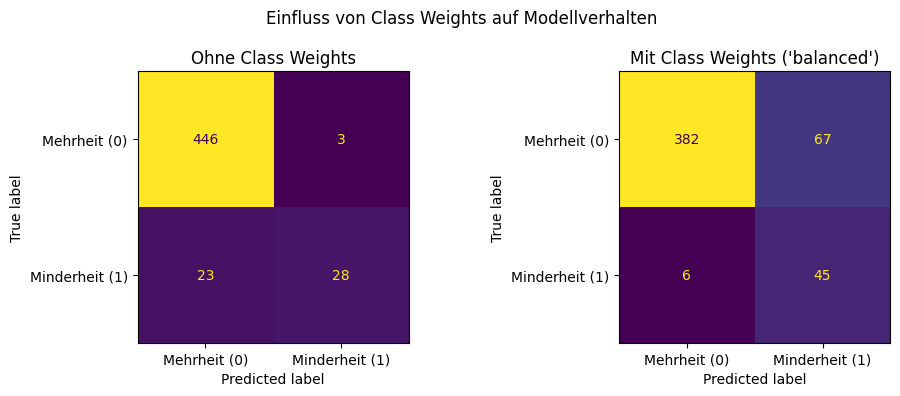

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- 1. Datensatz generieren (unausbalanciert) ---------------------
X, y = make_classification(n_samples=500, n_features=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9, 0.1], random_state=42)

# --- 2. Zwei Modelle: ohne und mit class_weight --------------------
model_no_weight = LogisticRegression(class_weight=None, solver='lbfgs')
model_weighted = LogisticRegression(class_weight='balanced', solver='lbfgs')

model_no_weight.fit(X, y)
model_weighted.fit(X, y)

# --- 3. Vorhersagen und Verwirrungsmatrizen ------------------------
y_pred_no = model_no_weight.predict(X)
y_pred_weighted = model_weighted.predict(X)

cm_no = confusion_matrix(y, y_pred_no)
cm_weighted = confusion_matrix(y, y_pred_weighted)

# --- 4. Plot: Verwirrungsmatrizen nebeneinander -------------------
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ConfusionMatrixDisplay(cm_no, display_labels=["Mehrheit (0)", "Minderheit (1)"]).plot(ax=ax[0], colorbar=False)
ax[0].set_title("Ohne Class Weights")

ConfusionMatrixDisplay(cm_weighted, display_labels=["Mehrheit (0)", "Minderheit (1)"]).plot(ax=ax[1], colorbar=False)
ax[1].set_title("Mit Class Weights ('balanced')")

plt.suptitle("Einfluss von Class Weights auf Modellverhalten")
plt.tight_layout()
plt.show()

# Data Cleansing


## Outlier Detection

In [18]:
# Z-Score
# --- 1. Beispiel-Daten ----------------------------------------
data = [10, 12, 11, 13, 12, 11, 12, 13, 90, 11, 12]

# --- 2. Mittelwert und Standardabweichung (rein Python) --------
mean = sum(data) / len(data)
variance = sum((x - mean) ** 2 for x in data) / len(data)
std_dev = variance ** 0.5

# --- 3. Z-Score-Schwelle definieren ----------------------------
threshold = 3  # typischer Grenzwert
outliers = [x for x in data if abs((x - mean) / std_dev) > threshold]

print(f"Mittelwert: {mean:.2f}")
print(f"Standardabweichung: {std_dev:.2f}")
print("Ausreißer:", outliers)

Mittelwert: 18.82
Standardabweichung: 22.53
Ausreißer: [90]


In [19]:
# IQR Methode
# --- 1. Daten -----------------------------------------
data = [10, 12, 13, 11, 14, 12, 13, 15, 16, 100, 11, 12, 13]

# --- 2. Quartile ohne NumPy ----------------------------
sorted_data = sorted(data)
n = len(sorted_data)

def percentile(p):
    k = (n - 1) * p / 100
    f = int(k)
    c = f + 1
    if c >= n:
        return sorted_data[f]
    return sorted_data[f] + (sorted_data[c] - sorted_data[f]) * (k - f)

Q1 = percentile(25)
Q3 = percentile(75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
print(f"Untergrenze = {lower_bound}, Obergrenze = {upper_bound}")
print("Ausreißer:", outliers)

Q1 = 12.0, Q3 = 14.0, IQR = 2.0
Untergrenze = 9.0, Obergrenze = 17.0
Ausreißer: [100]


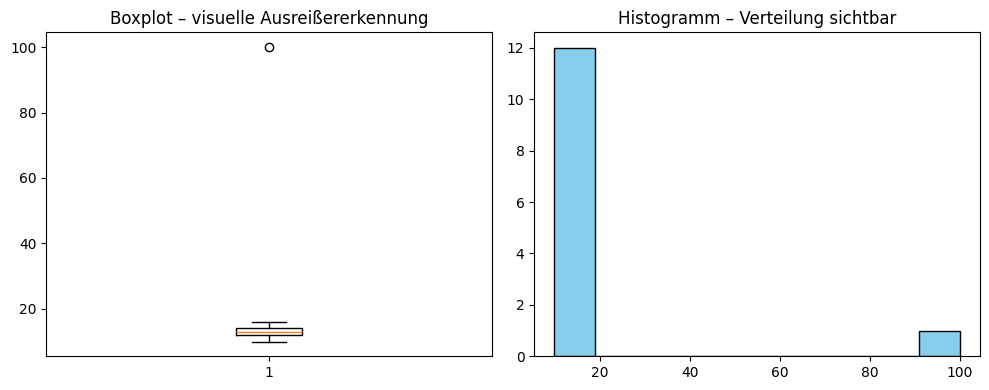

In [20]:
# Visual Inspection
import matplotlib.pyplot as plt

data = [10, 12, 13, 11, 14, 12, 13, 15, 16, 100, 11, 12, 13]

# --- 1. Boxplot ----------------------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(data, vert=True)
plt.title("Boxplot – visuelle Ausreißererkennung")

# --- 2. Histogramm -------------------------------------
plt.subplot(1,2,2)
plt.hist(data, bins=10, color="skyblue", edgecolor="black")
plt.title("Histogramm – Verteilung sichtbar")
plt.tight_layout()
plt.show()

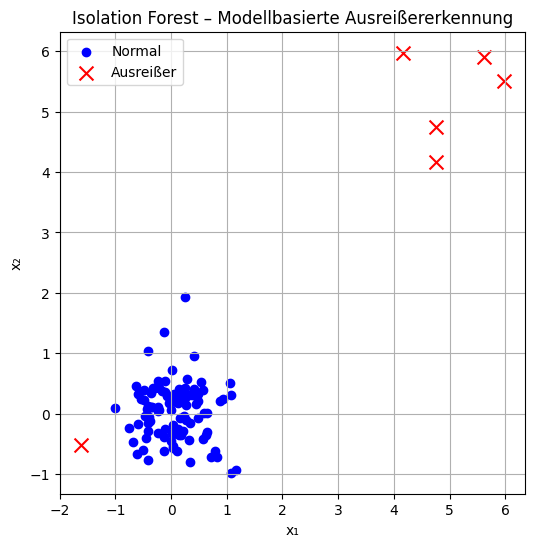

In [ ]:
#Isolation Forest
# https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# --- 1. Beispiel-Daten (2D) ----------------------------
X = np.concatenate([
    np.random.normal(loc=0, scale=0.5, size=(100, 2)),   # normale Punkte
    np.random.uniform(low=4, high=6, size=(5, 2))        # Ausreißer
])

# --- 2. Modell trainieren -------------------------------
model = IsolationForest(contamination=0.05, random_state=42)
labels = model.fit_predict(X)  # -1 = Ausreißer, 1 = normal

# --- 3. Plot --------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(X[labels==1,0], X[labels==1,1], color="blue", label="Normal")
plt.scatter(X[labels==-1,0], X[labels==-1,1], color="red", marker="x", s=100, label="Ausreißer")
plt.legend()
plt.title("Isolation Forest – Modellbasierte Ausreißererkennung")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()